# AE simulations
Comparing results of E+ v9.2 to v9.5 where the incident solar angle bug was fixed.

Annual energy and demand data only.

3 vintages, 6 climate zones (NREL's default cities)

In [1]:
# Dependencies
import pandas as pd
import os
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# # 2018 Egrid Costs (elec $/kWh, gas $/therm), change values per city
# gas = 0.83
# elec = 0.1314

---

## Import all csv files

In [3]:
energy92_path = "data/AllEnergy_92.csv"
energy95_path = "data/AllEnergy_95.csv"
demand92_path = "data/AllDemand_92.csv"
demand95_path = "data/AllDemand_95.csv"
demandAll_path = "data/AllDemand.csv"

In [4]:
demandAll = pd.read_csv(demandAll_path)

In [5]:
demandAll

,Run,Climate,System,Parametric,Heating [kBtuh]_92,Cooling [kBtuh]_92,Fan [kBtuh]_92,Heat [kW]_92,Cool [kW]_92,Fan [kW]_92,...,Heating [kBtuh]_95,Cooling [kBtuh]_95,Fan [kBtuh]_95,Heat [kW]_95,Cool [kW]_95,Fan [kW]_95,Demand [kW]_95,U,SHGC,Demand%Diff
0,1,2A,Elec,HOU+elecres+slab+IECC_1990_para00001Table.csv,30.0,0.00,3.00,8.79,0.0,0.91000,...,30.0,0.00,3.00,8.79,0.0,0.91000,9.70000,0.1,0.10,0.000000
1,2,2A,Elec,HOU+elecres+slab+IECC_1990_para00002Table.csv,30.0,0.00,1.00,8.79,0.0,0.42000,...,30.0,0.00,1.00,8.79,0.0,0.43000,9.22000,0.1,0.25,0.108578
2,3,2A,Elec,HOU+elecres+slab+IECC_1990_para00003Table.csv,30.0,0.00,2.00,8.79,0.0,0.47000,...,30.0,0.00,2.00,8.79,0.0,0.48000,9.27000,0.1,0.40,0.107991
3,4,2A,Elec,HOU+elecres+slab+IECC_1990_para00004Table.csv,30.0,0.00,2.00,8.79,0.0,0.52000,...,30.0,0.00,2.00,8.79,0.0,0.54000,9.33000,0.1,0.55,0.214823
4,5,2A,Elec,HOU+elecres+slab+IECC_1990_para00005Table.csv,30.0,0.00,2.00,8.79,0.0,0.58000,...,30.0,0.00,2.00,8.79,0.0,0.59000,9.38000,0.1,0.70,0.106724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,32,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00032Table.csv,0.0,5.03,1.24,0.00,1.5,0.36332,...,0.0,5.07,1.23,0.00,1.5,0.36039,1.86039,1.1,0.25,-0.157246
1292,33,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00033Table.csv,0.0,5.72,1.45,0.00,1.7,0.42485,...,0.0,5.79,1.46,0.00,1.7,0.42778,2.12778,1.1,0.40,0.137892
1293,34,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00034Table.csv,0.0,6.23,1.61,0.00,1.8,0.47173,...,0.0,6.21,1.61,0.00,1.8,0.47173,2.27173,1.1,0.55,0.000000
1294,35,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00035Table.csv,0.0,7.10,1.87,0.00,2.1,0.54791,...,0.0,7.08,1.87,0.00,2.1,0.54791,2.64791,1.1,0.70,0.000000


## Find the percent difference from 9.2 to 9.5

In [6]:
demandAll["DemandPercentDifference"] = ((demandAll['Demand [kW]_95'] - demandAll['Demand [kW]_92']) / demandAll['Demand [kW]_92']) * 100

demandAll

,Run,Climate,System,Parametric,Heating [kBtuh]_92,Cooling [kBtuh]_92,Fan [kBtuh]_92,Heat [kW]_92,Cool [kW]_92,Fan [kW]_92,...,Cooling [kBtuh]_95,Fan [kBtuh]_95,Heat [kW]_95,Cool [kW]_95,Fan [kW]_95,Demand [kW]_95,U,SHGC,Demand%Diff,DemandPercentDifference
0,1,2A,Elec,HOU+elecres+slab+IECC_1990_para00001Table.csv,30.0,0.00,3.00,8.79,0.0,0.91000,...,0.00,3.00,8.79,0.0,0.91000,9.70000,0.1,0.10,0.000000,0.000000
1,2,2A,Elec,HOU+elecres+slab+IECC_1990_para00002Table.csv,30.0,0.00,1.00,8.79,0.0,0.42000,...,0.00,1.00,8.79,0.0,0.43000,9.22000,0.1,0.25,0.108578,0.108578
2,3,2A,Elec,HOU+elecres+slab+IECC_1990_para00003Table.csv,30.0,0.00,2.00,8.79,0.0,0.47000,...,0.00,2.00,8.79,0.0,0.48000,9.27000,0.1,0.40,0.107991,0.107991
3,4,2A,Elec,HOU+elecres+slab+IECC_1990_para00004Table.csv,30.0,0.00,2.00,8.79,0.0,0.52000,...,0.00,2.00,8.79,0.0,0.54000,9.33000,0.1,0.55,0.214823,0.214823
4,5,2A,Elec,HOU+elecres+slab+IECC_1990_para00005Table.csv,30.0,0.00,2.00,8.79,0.0,0.58000,...,0.00,2.00,8.79,0.0,0.59000,9.38000,0.1,0.70,0.106724,0.106724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,32,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00032Table.csv,0.0,5.03,1.24,0.00,1.5,0.36332,...,5.07,1.23,0.00,1.5,0.36039,1.86039,1.1,0.25,-0.157246,-0.157246
1292,33,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00033Table.csv,0.0,5.72,1.45,0.00,1.7,0.42485,...,5.79,1.46,0.00,1.7,0.42778,2.12778,1.1,0.40,0.137892,0.137892
1293,34,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00034Table.csv,0.0,6.23,1.61,0.00,1.8,0.47173,...,6.21,1.61,0.00,1.8,0.47173,2.27173,1.1,0.55,0.000000,0.000000
1294,35,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00035Table.csv,0.0,7.10,1.87,0.00,2.1,0.54791,...,7.08,1.87,0.00,2.1,0.54791,2.64791,1.1,0.70,0.000000,0.000000


In [7]:
demandAll_group= demandAll.groupby(["Climate", "System"])

demandAll_group.mean()

Run  Heating [kBtuh]_92  Cooling [kBtuh]_92  Fan [kBtuh]_92  \
Climate System                                                                 
2A      Elec    18.5           28.617870            0.000000        1.596944   
        Gas     18.5            0.000000           10.287315        1.663333   
3A      Elec    18.5           37.423704            0.000000        1.535278   
        Gas     18.5            0.000000            9.206574        1.519074   
4A      Elec    18.5           39.698519            0.000000        1.409352   
        Gas     18.5            0.000000            8.540093        1.484444   
5A      Elec    18.5           54.138241            0.000000        1.898704   
        Gas     18.5            0.000000            8.607315        1.894907   
6A      Elec    18.5           55.506481            0.000000        1.806944   
        Gas     18.5            0.000000            8.076204        1.870000   
7       Elec    18.5           64.190463            0.000000        2.003981   
        Gas     18.5            0.000000            7.147963        1.805926   

                Heat [kW]_92  Cool [kW]_92  Fan [kW]_92  Demand [kW]_92  \
Climate System                                                            
2A      Elec        8.395463      0.000000     0.469340        8.864803   
        Gas         0.000000      3.009907     0.489292        3.499199   
3A      Elec       10.965833      0.000000     0.449836       11.415670   
        Gas         0.000000      2.697222     0.445089        3.142311   
4A      Elec       11.632778      0.000000     0.412940       12.045718   
        Gas         0.000000      2.500000     0.434942        2.934942   
5A      Elec       15.862407      0.000000     0.556320       16.418728   
        Gas         0.000000      2.522222     0.555208        3.077430   
6A      Elec       16.262963      0.000000     0.529435       16.792398   
        Gas         0.000000      2.366667     0.547910        2.914577   
7       Elec       18.807130      0.000000     0.587167       19.394296   
        Gas         0.000000      2.092593     0.529136        2.621729   

                Heating [kBtuh]_95  Cooling [kBtuh]_95  Fan [kBtuh]_95  \
Climate System                                                           
2A      Elec             28.618796            0.000000        1.609167   
        Gas               0.000000           10.349352        1.682685   
3A      Elec             37.416667            0.000000        1.553148   
        Gas               0.000000            9.284352        1.533333   
4A      Elec             39.684722            0.000000        1.428056   
        Gas               0.000000            8.625741        1.498796   
5A      Elec             54.126667            0.000000        1.911944   
        Gas               0.000000            8.705370        1.915648   
6A      Elec             55.490741            0.000000        1.816944   
        Gas               0.000000            8.146852        1.884352   
7       Elec             64.188704            0.000000        2.005463   
        Gas               0.000000            7.225741        1.824907   

                Heat [kW]_95  Cool [kW]_95  Fan [kW]_95  Demand [kW]_95    U  \
Climate System                                                                 
2A      Elec        8.395833      0.000000     0.474588        8.870421  0.6   
        Gas         0.000000      3.032593     0.493545        3.526138  0.6   
3A      Elec       10.963333      0.000000     0.455072       11.418406  0.6   
        Gas         0.000000      2.717593     0.449267        3.166859  0.6   
4A      Elec       11.628611      0.000000     0.418420       12.047031  0.6   
        Gas         0.000000      2.527914     0.439147        2.967061  0.6   
5A      Elec       15.859537      0.000000     0.560200       16.419737  0.6   
        Gas         0.000000      2.550000     0.561285        3.111285  0.6   
6A      

## 2A Houston 

In [8]:
demand_hou1990elec = demandAll[0:36]

demand_hou2006elec = demandAll[36:72]

demand_hou2018elec = demandAll[72:108]

demand_hou1990gas = demandAll[108:144]

demand_hou2006gas = demandAll[144:180]

demand_hou2018gas = demandAll[180:216]

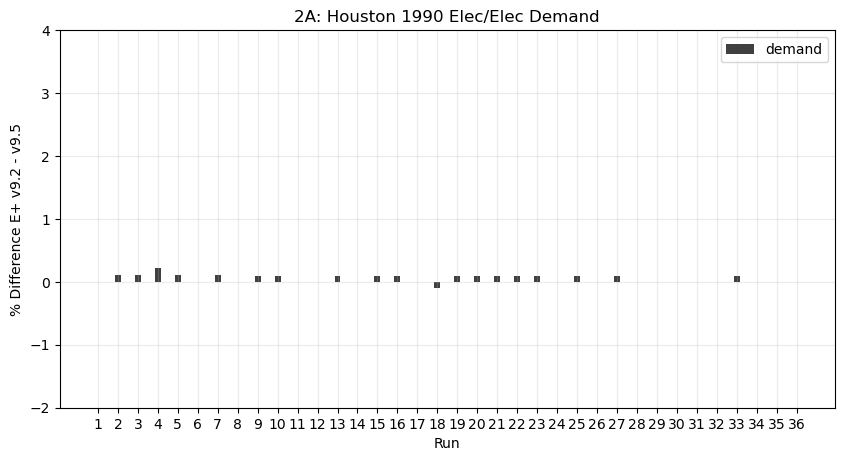

In [9]:
# HOU 1990 elec demand

x1 = demand_hou1990elec["Run"]
demand1 = demand_hou1990elec["DemandPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x1,demand1, width=w, color="k", label="demand", align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("2A: Houston 1990 Elec/Elec Demand")
plt.xlabel("Run")
plt.xticks(x1)
plt.ylim([-2, 4])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/hou1990elecdemand.png")
plt.show()

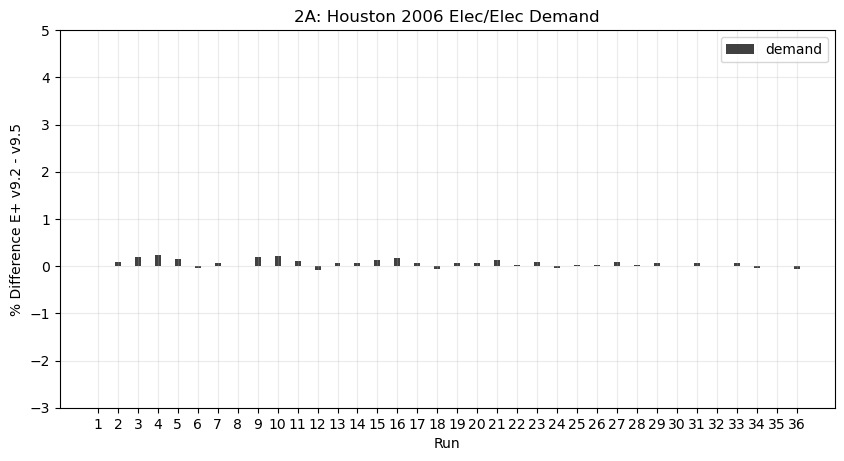

In [10]:
# HOU 2006 elec demand

x2 = demand_hou2006elec["Run"]
demand2 = demand_hou2006elec["DemandPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x2,demand2, width=w, color="k", label="demand", align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("2A: Houston 2006 Elec/Elec Demand")
plt.xlabel("Run")
plt.xticks(x2)
plt.ylim([-3, 5])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/hou2006elecdemand.png")
plt.show()

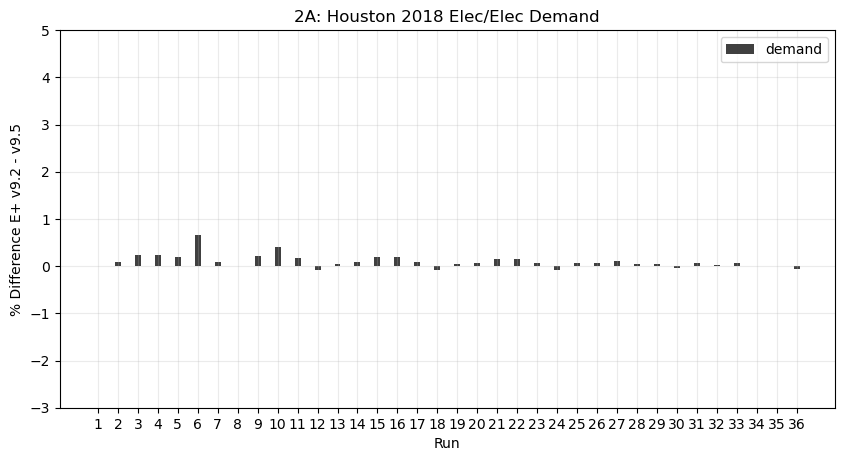

In [11]:
# HOU 2018 elec demand

x3 = demand_hou2006elec["Run"]
demand3 = demand_hou2018elec["DemandPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x3,demand3, width=w, color="k", label="demand", align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("2A: Houston 2018 Elec/Elec Demand")
plt.xlabel("Run")
plt.xticks(x3)
plt.ylim([-3, 5])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/hou2018elecdemand.png")
plt.show()

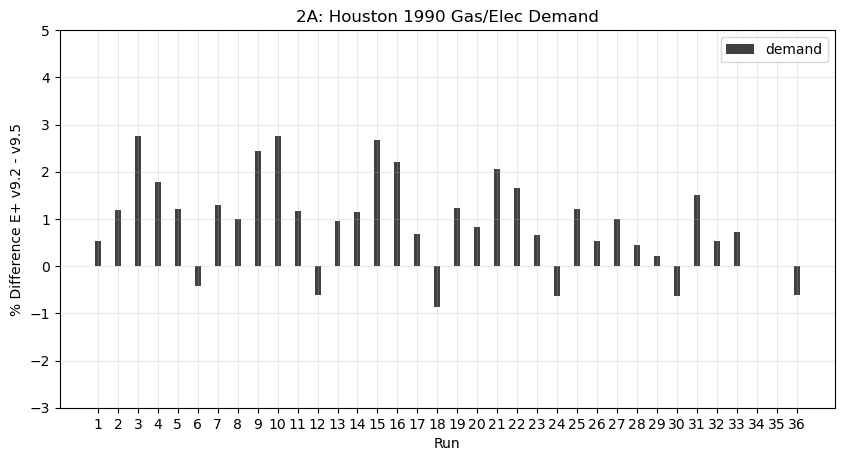

In [12]:
# HOU 1990 gas demand

x4 = demand_hou1990gas["Run"]
demand4 = demand_hou1990gas["DemandPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x4,demand4, width=w, color="k", label="demand", align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("2A: Houston 1990 Gas/Elec Demand")
plt.xlabel("Run")
plt.xticks(x4)
plt.ylim([-3, 5])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/hou1990gasdemand.png")
plt.show()

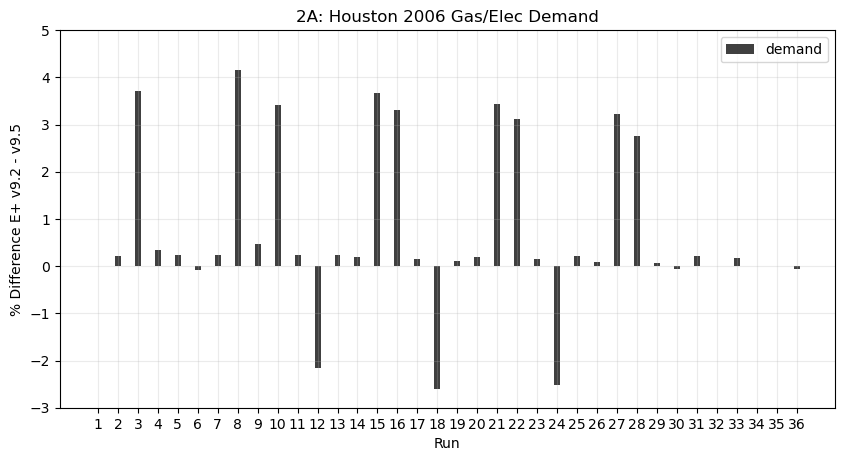

In [13]:
# HOU 2006 gas demand

x5 = demand_hou2006gas["Run"]
demand5 = demand_hou2006gas["DemandPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x5,demand5, width=w, color="k", label="demand", align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("2A: Houston 2006 Gas/Elec Demand")
plt.xlabel("Run")
plt.xticks(x5)
plt.ylim([-3, 5])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/hou2006gasdemand.png")
plt.show()

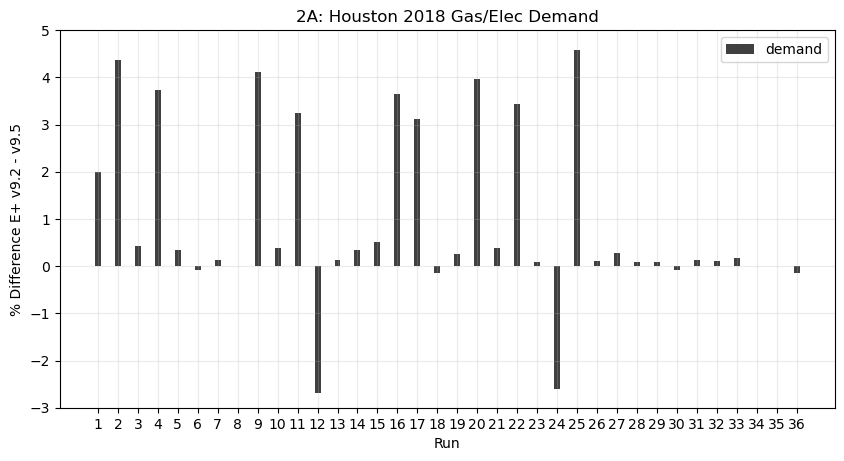

In [14]:
# HOU 2018 gas demand

x6 = demand_hou2018gas["Run"]
demand6 = demand_hou2018gas["DemandPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x6,demand6, width=w, color="k", label="demand", align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("2A: Houston 2018 Gas/Elec Demand")
plt.xlabel("Run")
plt.xticks(x6)
plt.ylim([-3, 5])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/hou2018gasdemand.png")
plt.show()